## Description

**This dataset describes sales of items in a bakery on a particular day starting from 2013-2015. The attributes are given below:**

Weekday- Day of the week

Date- Date of sales

Cakes- Number of cakes sold

Pies- Number of pies sold

Cookies- Number of cookies sold

Smoothies- Number of smoothies sold on a particular day

Coffee- Number of Coffee sold on a particular day

Promotion- If there were any offers or not, “None” if there were no offers and “promotion” if there were any special 
offers or discounts.

**Objective
Perform Exploratory Data analysis on the dataset to understand the following:**
1. Which category of food is sold the most?
2. How do promotions affect sales of items?
3. Find any patterns that differentiates between weekend and weekday sales.
4. How have the sales improved over the span of two years?
5. Analyze monthly sales to understand buying patterns.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
data= pd.read_csv('BakeryData.csv')
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion
0,NaN,NaN,NaN,NaN,Tuesday,2,1/1/2013,79,46,518,60,233,none
1,1.0,Monday,NaN,NaN,Wednesday,3,1/2/2013,91,50,539,161,427,none
2,2.0,Tuesday,NaN,NaN,Thursday,4,1/3/2013,47,60,222,166,347,none
3,3.0,Wednesday,NaN,NaN,Friday,5,1/4/2013,89,64,734,153,358,none
4,4.0,Thursday,NaN,NaN,Saturday,6,1/5/2013,112,73,764,240,392,none
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,NaN,NaN,NaN,NaN,Sunday,7,12/27/2015,136,49,700,265,483,none
1091,NaN,NaN,NaN,NaN,Monday,1,12/28/2015,77,45,605,69,408,none
1092,NaN,NaN,NaN,NaN,Tuesday,2,12/29/2015,93,56,508,185,452,none
1093,NaN,NaN,NaN,NaN,Wednesday,3,12/30/2015,62,28,458,141,356,none


## Data Cleaning

In [3]:
data.isnull().sum()

Unnamed: 0    1088
Unnamed: 1    1088
Unnamed: 2    1095
Unnamed: 3    1095
daywk            0
weekday          0
Date             0
Cakes            0
Pies             0
Cookies          0
Smoothies        0
Coffee           0
promotion        0
dtype: int64

In [4]:
data= data.drop(columns=['Unnamed: 0','Unnamed: 1','Unnamed: 2','Unnamed: 3'])

In [5]:
data.isnull().sum()

daywk        0
weekday      0
Date         0
Cakes        0
Pies         0
Cookies      0
Smoothies    0
Coffee       0
promotion    0
dtype: int64

## Data Analysis 

In [6]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
weekday,1095.0,3.997260,1.999312,1.0,2.0,4.0,6.0,7.0
Cakes,1095.0,86.280365,20.276672,32.0,73.0,85.0,98.0,165.0
Pies,1095.0,53.547945,13.371886,16.0,44.0,52.0,62.0,98.0
Cookies,1095.0,540.451142,132.354363,222.0,445.0,533.0,625.0,1152.0
Smoothies,1095.0,218.466667,74.350930,50.0,165.0,206.0,261.5,551.0
Coffee,1095.0,391.626484,102.930517,111.0,317.5,388.0,453.0,771.0


In [7]:
data['promotion'].value_counts()

none         985
promotion    110
Name: promotion, dtype: int64

In [8]:
data.dtypes

daywk        object
weekday       int64
Date         object
Cakes         int64
Pies          int64
Cookies       int64
Smoothies     int64
Coffee        int64
promotion    object
dtype: object

In [9]:
data

,daywk,weekday,Date,Cakes,Pies,Cookies,Smoothies,Coffee,promotion
0,Tuesday,2,1/1/2013,79,46,518,60,233,none
1,Wednesday,3,1/2/2013,91,50,539,161,427,none
2,Thursday,4,1/3/2013,47,60,222,166,347,none
3,Friday,5,1/4/2013,89,64,734,153,358,none
4,Saturday,6,1/5/2013,112,73,764,240,392,none
...,...,...,...,...,...,...,...,...,...
1090,Sunday,7,12/27/2015,136,49,700,265,483,none
1091,Monday,1,12/28/2015,77,45,605,69,408,none
1092,Tuesday,2,12/29/2015,93,56,508,185,452,none
1093,Wednesday,3,12/30/2015,62,28,458,141,356,none


## Feature extraction

In [10]:
data['Date'] = pd.to_datetime(data['Date'])

In [11]:
data['Year']=pd.to_datetime(data['Date']).dt.to_period('Y')
data['Month'] = data['Date'].dt.month
data['Day'] = data['Date'].dt.day

In [12]:
data= data.drop(columns=['Date'])

## Data Visualization

In [13]:
#import pandas_profiling
#report= pandas_profiling.ProfileReport(data)
#report.to_file('bakery_pandas_profiling.html')

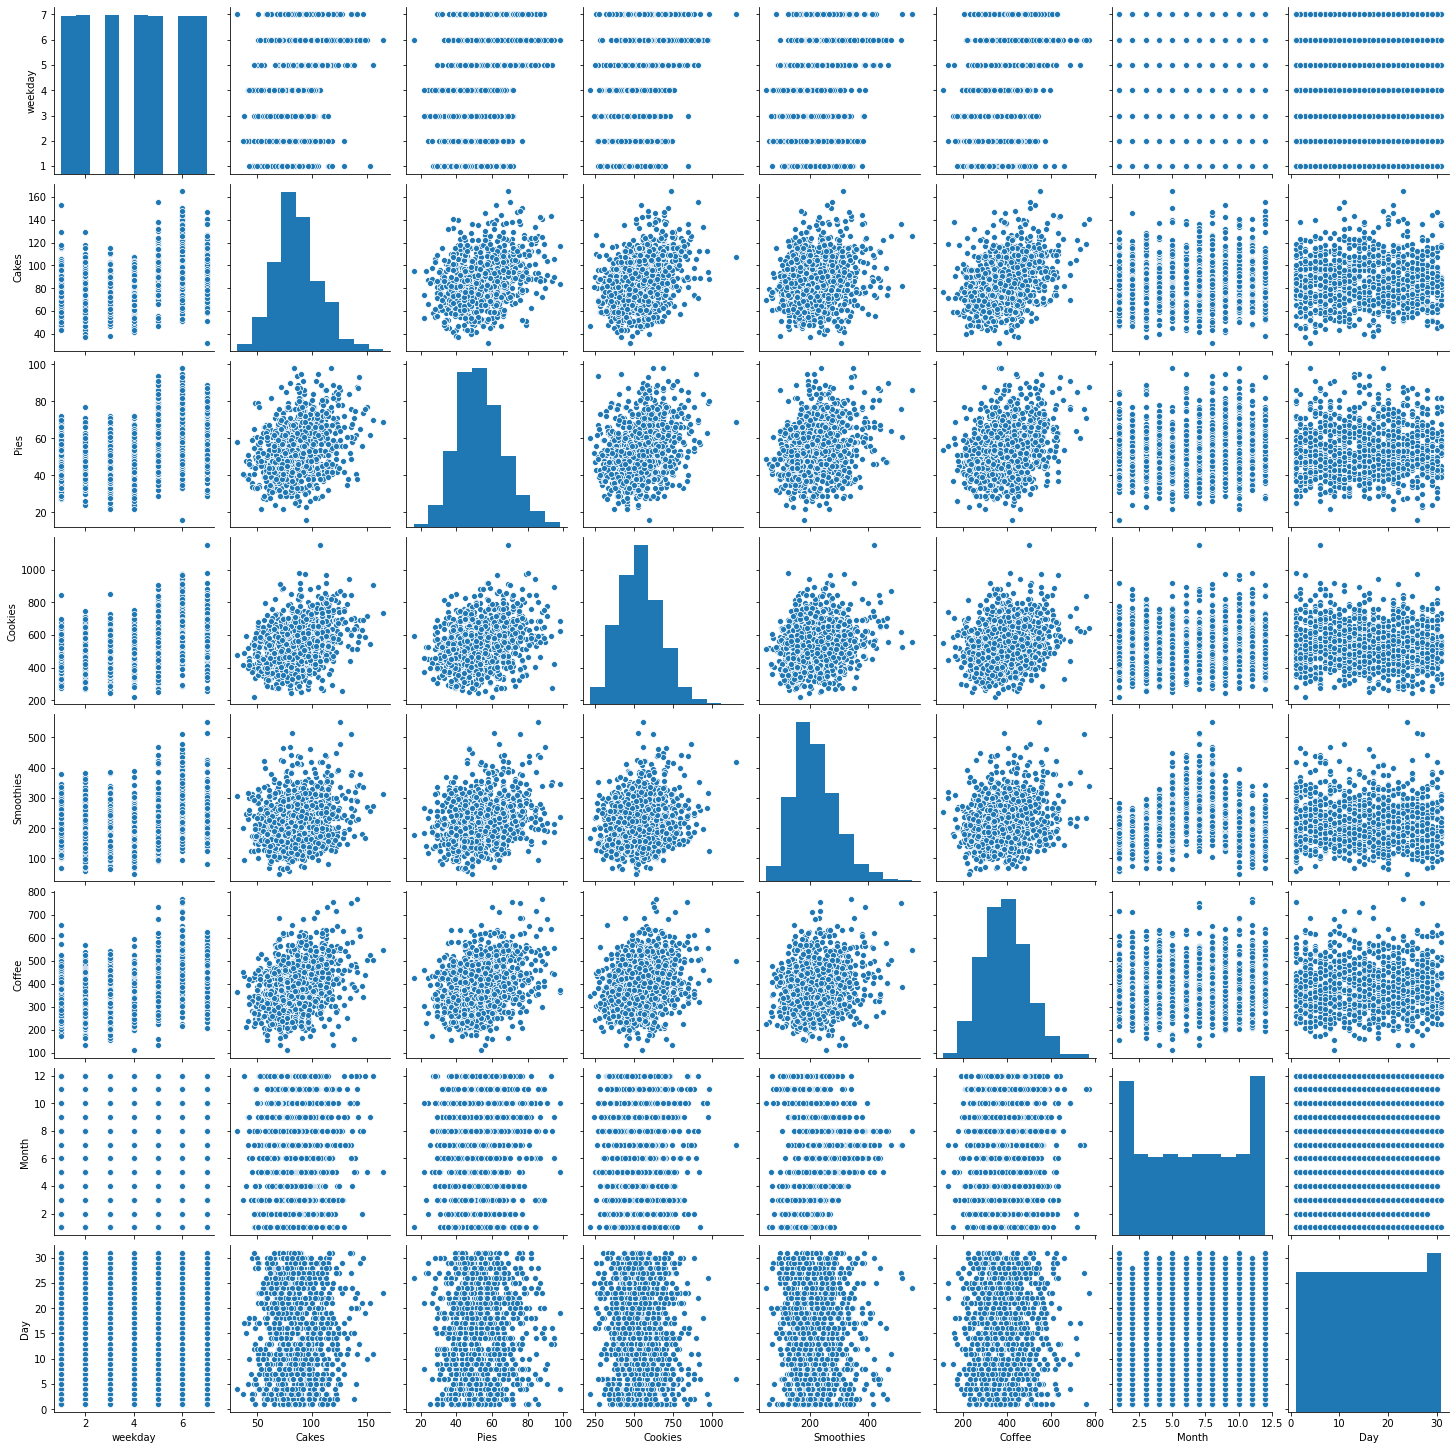

In [14]:
sns.pairplot(data)

**Most of the columns data follows normal distribution**

In [15]:
data

,daywk,weekday,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,Year,Month,Day
0,Tuesday,2,79,46,518,60,233,none,2013,1,1
1,Wednesday,3,91,50,539,161,427,none,2013,1,2
2,Thursday,4,47,60,222,166,347,none,2013,1,3
3,Friday,5,89,64,734,153,358,none,2013,1,4
4,Saturday,6,112,73,764,240,392,none,2013,1,5
...,...,...,...,...,...,...,...,...,...,...,...
1090,Sunday,7,136,49,700,265,483,none,2015,12,27
1091,Monday,1,77,45,605,69,408,none,2015,12,28
1092,Tuesday,2,93,56,508,185,452,none,2015,12,29
1093,Wednesday,3,62,28,458,141,356,none,2015,12,30


In [16]:
columns= [ 'Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']


<ipython-input-35-b21b194c0866>:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data.groupby('Year')['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'].sum().plot(kind='barh')


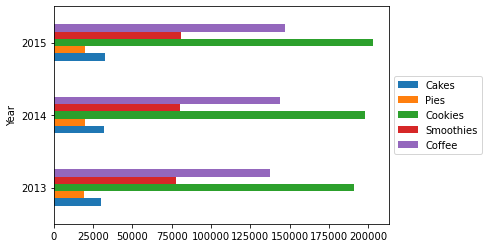

In [35]:
data.groupby('Year')['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'].sum().plot(kind='barh')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

**There has been an increase in sales in all the items year by year**

## Which category of food is sold the most:

In [18]:
#import plotly.express as px
#import plotly.graph_objects as go
#import plotly.offline as py
#df = px.data.gapminder()
#fig = px.sunburst(data, path=['Year','Month'], values='Cookies',
 #                 hover_data=['Cookies'])
#fig.show()


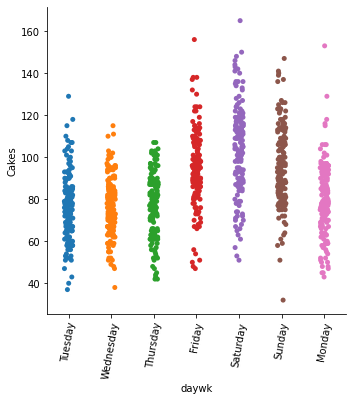

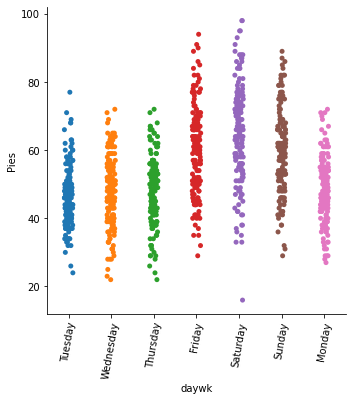

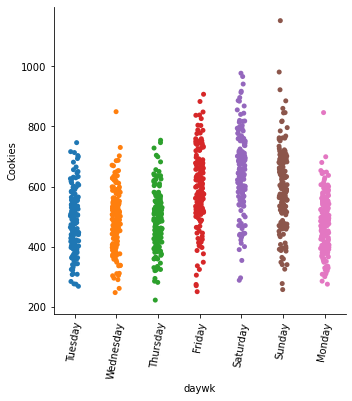

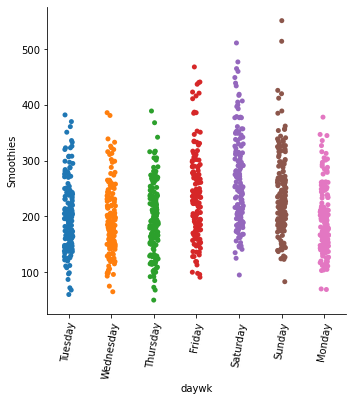

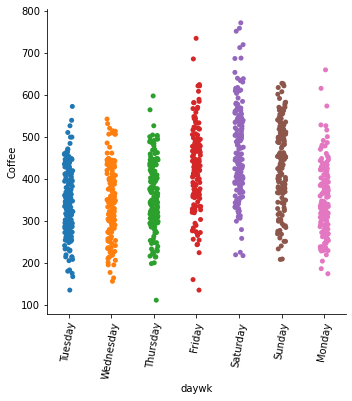

In [19]:
#day-wise
columns= [ 'Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']

size=len(columns)
x = 'daywk'
y = columns[0:size]

for i in range(0,size):
    sns.catplot(x = x, y = y[i], data = data)
    plt.xticks(rotation=80)
    plt.show()

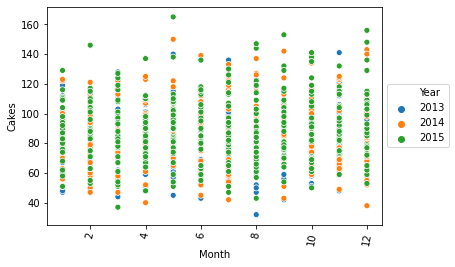

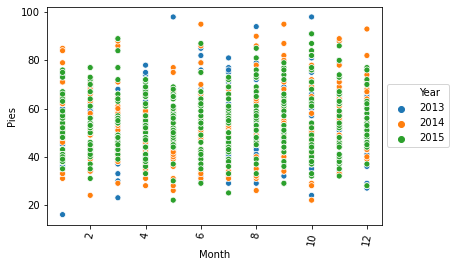

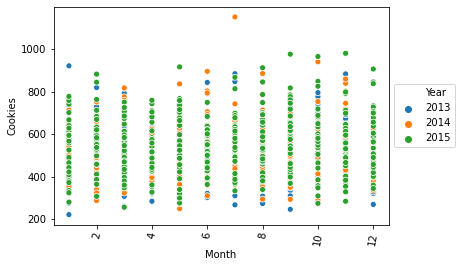

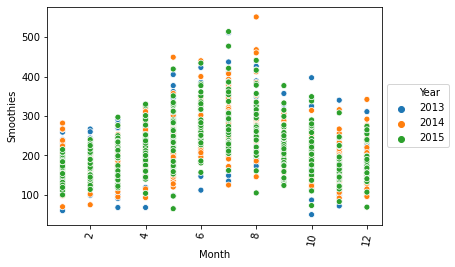

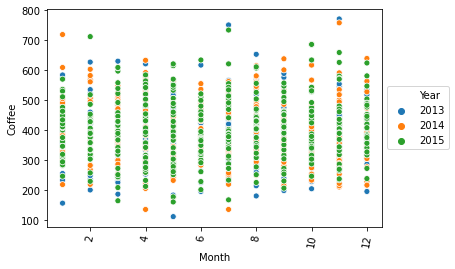

In [34]:
#month-wise sales

columns= [ 'Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee']

size=len(columns)
x = 'Month'
y = columns[0:size]

for i in range(0,size):
    sns.scatterplot(x = x, y = y[i], data = data,hue= 'Year')
    plt.xticks(rotation=80)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
    plt.show()

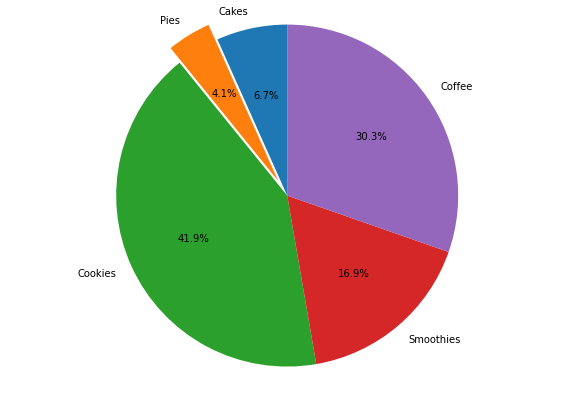

In [21]:
#overall items sales 
labels = columns
explode = (0, 0.1, 0, 0, 0)  

_data= pd.DataFrame(data,columns=columns)
pie_data= _data.sum()

fig1, ax1 = plt.subplots(figsize=(10,7))

ax1.pie(pie_data, explode=explode, labels=columns, autopct='%1.1f%%',
        shadow=False, startangle=90)

ax1.axis('equal') 

plt.show()



<ipython-input-33-358a3feb6d90>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  year_data=data.groupby('Year')['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'].sum()


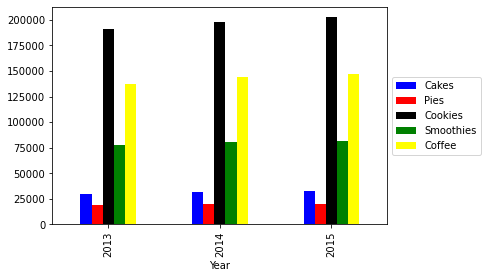

In [33]:
#yearwise sale

year_data=data.groupby('Year')['Cakes', 'Pies', 'Cookies', 'Smoothies', 'Coffee'].sum()
#year_data['total_sales']=year_data.sum(axis=1)
year_data.plot.bar(color=['blue','red','black','green','yellow'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## How do promotions effect sales of items

In [23]:
data['count'] = _data.sum(axis=1)
data

,daywk,weekday,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,Year,Month,Day,count
0,Tuesday,2,79,46,518,60,233,none,2013,1,1,936
1,Wednesday,3,91,50,539,161,427,none,2013,1,2,1268
2,Thursday,4,47,60,222,166,347,none,2013,1,3,842
3,Friday,5,89,64,734,153,358,none,2013,1,4,1398
4,Saturday,6,112,73,764,240,392,none,2013,1,5,1581
...,...,...,...,...,...,...,...,...,...,...,...,...
1090,Sunday,7,136,49,700,265,483,none,2015,12,27,1633
1091,Monday,1,77,45,605,69,408,none,2015,12,28,1204
1092,Tuesday,2,93,56,508,185,452,none,2015,12,29,1294
1093,Wednesday,3,62,28,458,141,356,none,2015,12,30,1045


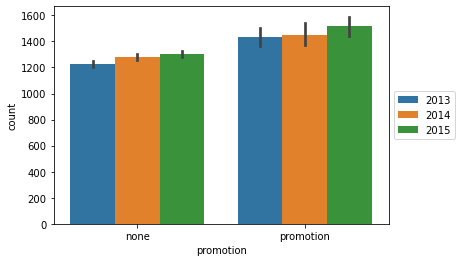

In [32]:
sns.barplot(x = 'promotion', y = 'count', data = data, hue = 'Year')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

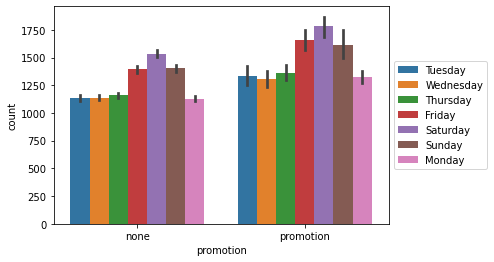

In [31]:
sns.barplot(x = 'promotion', y = 'count', data = data, hue = 'daywk')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

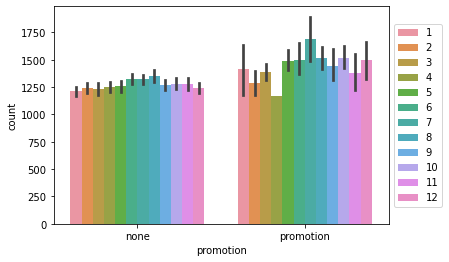

In [41]:
sns.barplot(x = 'promotion', y = 'count', data = data, hue = 'Month')
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

## Find any patterns that differentiates between weekend and weekday sales.

In [45]:
data['weekend']= data['weekday'].apply(lambda x: 1 if x == 6 or x == 7 else 0)
data

,daywk,weekday,Cakes,Pies,Cookies,Smoothies,Coffee,promotion,Year,Month,Day,count,weekend
0,Tuesday,2,79,46,518,60,233,none,2013,1,1,936,0
1,Wednesday,3,91,50,539,161,427,none,2013,1,2,1268,0
2,Thursday,4,47,60,222,166,347,none,2013,1,3,842,0
3,Friday,5,89,64,734,153,358,none,2013,1,4,1398,0
4,Saturday,6,112,73,764,240,392,none,2013,1,5,1581,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,Sunday,7,136,49,700,265,483,none,2015,12,27,1633,1
1091,Monday,1,77,45,605,69,408,none,2015,12,28,1204,0
1092,Tuesday,2,93,56,508,185,452,none,2015,12,29,1294,0
1093,Wednesday,3,62,28,458,141,356,none,2015,12,30,1045,0


<ipython-input-46-3832821b33a9>:3: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  wknd_data=data.groupby('weekend')['Cakes', 'Pies', 'Cookies', 'Smoothies','Coffee'].sum()


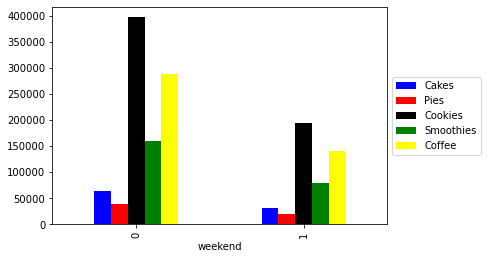

In [46]:
#weekend and weekday sales

wknd_data=data.groupby('weekend')['Cakes', 'Pies', 'Cookies', 'Smoothies','Coffee'].sum()
wknd_data.plot.bar(color=['blue','red','black','green','yellow'])
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

weekend days are less so the graph shows less sales..but comparitively weekends have more sales than weekdays